- gitÏóê Ïª§Î∞ã ÏïàÎê®. ÏõêÏù∏ ÌååÏïÖÌïòÍ∏∞

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! unzip -qq "/content/drive/MyDrive/incheon/incheon.zip" -d "/content/drive/MyDrive/incheon"

# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò

In [ ]:
# 1. ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò Î∞è Î°úÎìú
"""  ftfy (Fixes Text for You)
ÏùòÎØ∏: "Î¨∏ÏûêÏó¥ Íπ®Ïßê(Ïù∏ÏΩîÎî© Î¨∏Ï†ú)ÏùÑ ÏûêÎèôÏúºÎ°ú Î≥µÍµ¨Ìï¥Ï£ºÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨"
"""
!pip install ftfy tqdm seaborn
!pip install git+https://github.com/openai/CLIP.git


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/openai/CLIP.git to c:\users\hnn07\appdata\local\temp\pip-req-build-77wkiuk5
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\hnn07\AppData\Local\Temp\pip-req-build-77wkiuk5'

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Î™®Îç∏ Î°úÎìú Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

In [24]:
import os
import torch
import clip
from PIL import Image
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows Í∏∞Î≥∏ ÌïúÍ∏Ä Ìè∞Ìä∏



In [43]:


# 2. Î™®Îç∏ Î°úÎî©
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# ÏûÑÎ≤†Îî© ÏÉùÏÑ±

In [44]:
from tqdm import tqdm # ColabÏóêÏÑú Ïûò ÏûëÎèôÌïòÎäî Î≤ÑÏ†Ñ

# 3. Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© ÏÉùÏÑ±
image_dir = "../data/images/incheon"  # Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
image_features = [] # ÏûÑÎ≤†Îî© Ï†ÄÏû• Î¶¨Ïä§Ìä∏
labels = [] # ÌååÏùºÎ™Ö(ÌôïÏû•Ïûê Ï†úÍ±∞) Ï†ÄÏû• Î¶¨Ïä§Ìä∏

file_list = sorted([f for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))])

for filename in tqdm(file_list, desc="üîÑ Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© ÏÉùÏÑ± Ï§ë..."):
    try:
        img_path = os.path.join(image_dir, filename)
        img = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
        with torch.no_grad(): # Ï∂îÎ°† Îã®Í≥ÑÏóêÏÑú Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Í≥ÑÏÇ∞ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï.
            feat = model.encode_image(img) # Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© Ïã§Ïãú
            feat /= feat.norm(dim=-1, keepdim=True) # ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î•º L2 Ï†ïÍ∑úÌôî Ìï®. Î∞©Ìñ•ÏùÑ ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ 1Î°ú ÎßûÏ∂îÏÑú Ïã§Ìñâ.

            image_features.append(feat.cpu().numpy()[0])
            labels.append(os.path.splitext(filename)[0])
    except Exception as e:
        print(f"‚ö†Ô∏è {filename} Ïò§Î•ò Î∞úÏÉù: {e}")
        

üîÑ Ïù¥ÎØ∏ÏßÄ ÏûÑÎ≤†Îî© ÏÉùÏÑ± Ï§ë...: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1444/1444 [00:53<00:00, 26.85it/s]


# t-SNE ÏãúÍ∞ÅÌôî
- Ïã§Ìóò Í≤∞Í≥º
  - ÎöúÎ†∑Ìïú Î∂ÑÎ•ò Í≤∞Í≥ºÎ•º ÌôïÏù∏ÌïòÍ∏∞ÏóêÎäî Ïñ¥Î†§Ïõ†Îã§. Í∑∏Î†áÍ∏∞Ïóê K-meas ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÌôúÏö©Ìï¥ Íµ∞ÏßëÌôîÌïòÍ≥† Ïù¥Î•º ÌôïÏù∏ÌïòÍ≥†Ïûê ÌïúÎã§.

c:\Users\hnn07\Documents\Gptrip\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


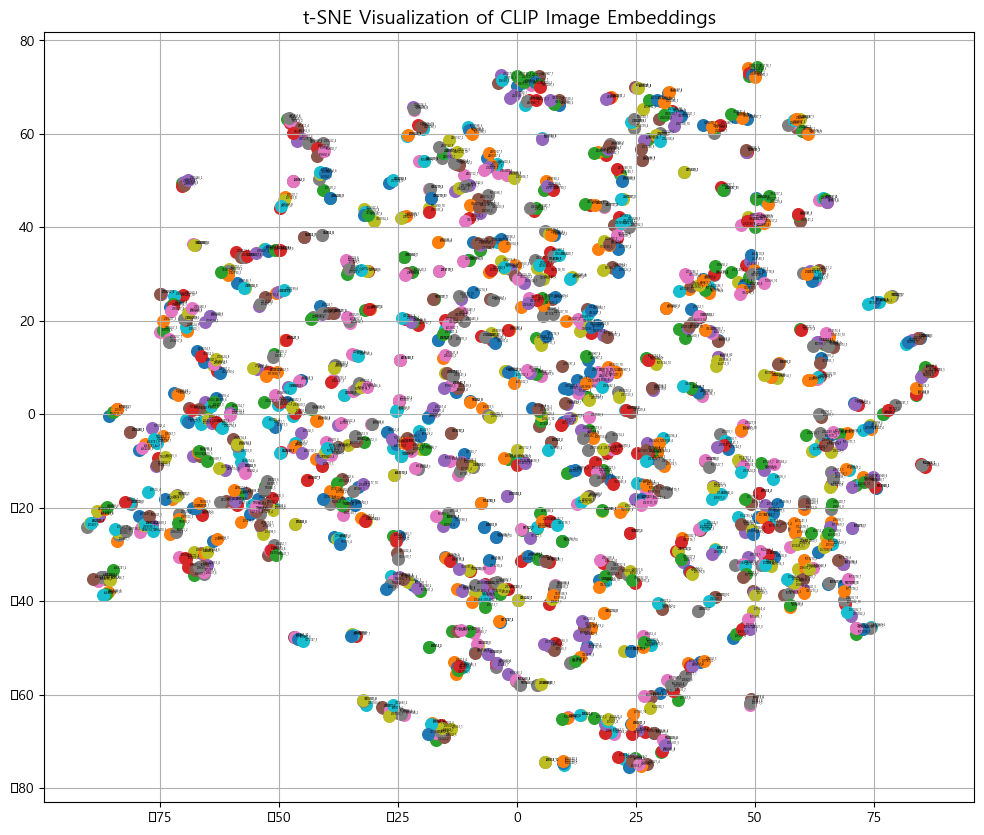

In [45]:
image_features_np = np.vstack(image_features)

# 4. t-SNE ÏãúÍ∞ÅÌôî
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(image_features_np)

# 5. ÏãúÍ∞ÅÌôî Ï∂úÎ†•
plt.figure(figsize=(12, 10))
for i, label in enumerate(labels):
    x, y = tsne_result[i]
    plt.scatter(x, y, s=70)
    plt.text(x + 0.3, y + 0.3, label, fontsize=2)
plt.title("t-SNE Visualization of CLIP Image Embeddings", fontsize=14)
plt.grid(True)
plt.show()

## Íµ∞ÏßëÌôî
- ÏùºÎã® Íµ∞ÏßëÌôîÎ•º Ïó¨Îü¨ Í∞úÎ•º ÌïòÎ©¥ÏÑú Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥Î≥¥ÏïòÎã§. Íµ∞ÏßëÌôîÎ•º Ìï¥Î≥¥Î©¥ÏÑú ÌôïÏù∏Ìïú Í≤∞Í≥º, Ïñ¥Îäê Ï†ïÎèÑÏùò Ïú†ÏÇ¨ÏÑ±Ïù¥ ÏûàÏùåÏùÑ ÌôïÏù∏ÌïòÏòÄÎã§. ÏµúÏ†ÅÌôîÎêú Íµ∞ÏßëÌôîÎ•º Ï∞æÏïÑÏïº Ìï† ÌïÑÏöîÏÑ±ÏùÑ ÎäêÍºàÎã§.
### ÎåÄÏ≤ò Î∞©Ïïà
- Elbow Method
  - ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù SSE(ÏùëÏßëÎèÑ) Í∞êÏÜå ‚Üí Í∏âÍ≤©Ìïú Í∫æÏûÑ(ÏóòÎ≥¥Ïö∞) ÏßÄÏ†êÏù¥ ÏµúÏ†Å
- Silhouette Score
  - Í∞Å ÏÉòÌîåÏù¥ ÏûêÍ∏∞ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏñºÎßàÎÇò Ïûò Ïñ¥Ïö∏Î¶¨ÎäîÏßÄ(0~1)
     - ÎÜíÏùÑ ÏàòÎ°ù Ï¢ãÎã§.


In [46]:
from sklearn.cluster import KMeans

# Íµ∞Ïßë Ïàò ÏÑ§Ï†ï (Ïòà: 5Í∞úÏùò Í∞êÏÑ± Î∂ÑÏúÑÍ∏∞ Í∑∏Î£π)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(image_features_np)
cluster_ids = kmeans.labels_

c:\Users\hnn07\Documents\Gptrip\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


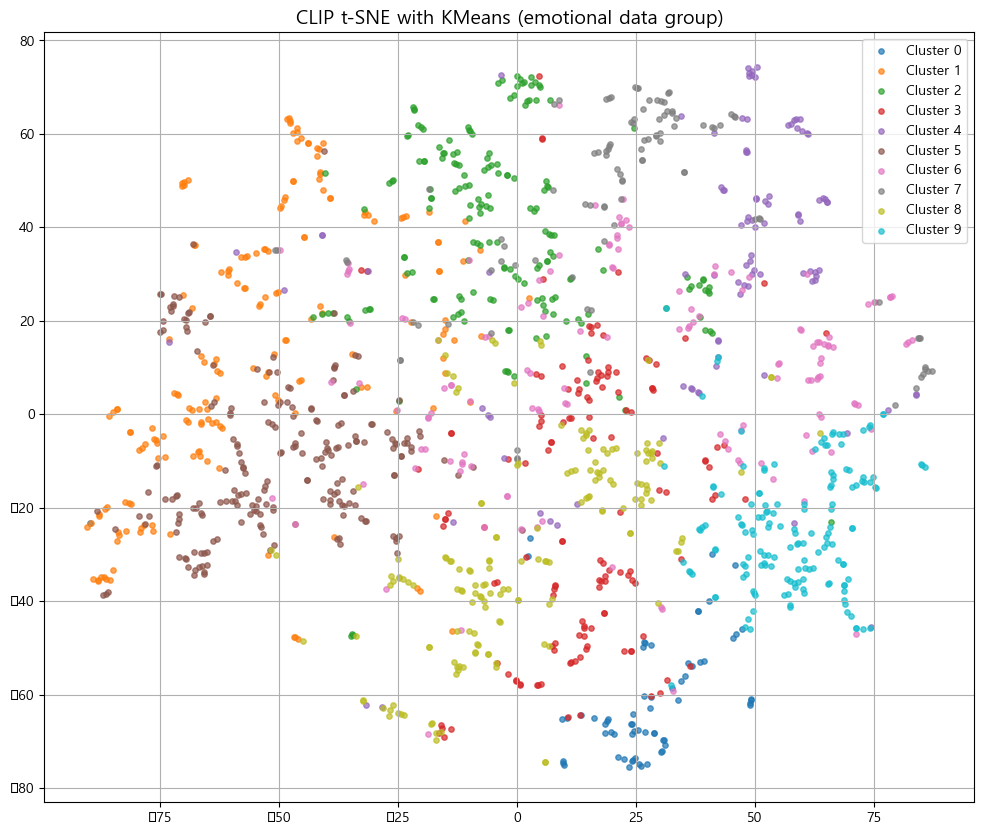

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
palette = sns.color_palette("tab10", n_clusters)

for i in range(n_clusters):
    cluster_points = tsne_result[cluster_ids == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                s=15, color=palette[i], label=f"Cluster {i}", alpha=0.7)

plt.title("CLIP t-SNE with KMeans (emotional data group)", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## ÏàòÏπò ÌôïÏù∏ Í≤∞Í≥º
- ÌôïÏù∏ Í≤∞Í≥º 6Ïù¥ Ï†ÅÎãπÌïú ÏàòÏπòÎ•º Î≥¥ÏûÑÏùÑ ÌôïÏù∏ÌïòÏòÄÎã§.
- Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú ÌÉúÍ∑∏ ÏûëÏóÖÏùÑ ÏàòÌñâÌï† Îïå, ÏàòÌñâÌïòÍ∏∞Ïóê Ï¢ãÏïÑ Î≥¥Ïù∏Îã§Í≥† ÌåêÎã®ÌñàÎã§.

- ÏôºÏ™Ω Í∑∏ÎûòÌîÑ: Elbow Method (SSE)
  - Í∏âÍ≤©Ìïú Í∞êÏÜåÍ∞Ä Î©àÏ∂îÍ≥† ÏôÑÎßåÌï¥ÏßÄÎäî ÏßÄÏ†êÏù¥ Ï°¥Ïû¨Ìï®
    ‚Üí Ïù¥ ÏßÄÏ†êÏùÑ **ÏóòÎ≥¥Ïö∞(elbow)**ÎùºÍ≥† Î∂ÄÎ•¥Í≥†, ÏµúÏ†ÅÏùò Íµ∞Ïßë Ïàò ÌõÑÎ≥¥Î°ú Î≥∏Îã§. (ÌôïÏù∏ Í≤∞Í≥º ÏïΩ 6~8Î∂ÄÌÑ∞ ÏôÑÎßåÌï¥ÏßÄÍ∏∞ ÏãúÏûë.)
- Ïò§Î•∏Ï™Ω Í∑∏ÎûòÌîÑ: Silhouette Score
  - YÏ∂ï: Score (0~1) ‚Äî Íµ∞ÏßëÏù¥ ÏñºÎßàÎÇò Ïûò Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄÎ•º Ï†ïÎüâÏ†ÅÏúºÎ°ú ÌèâÍ∞Ä
  - XÏ∂ï: Cluster Count (k)
     - k=6~10 Î∂ÄÍ∑ºÏóêÏÑú ÎπÑÍµêÏ†Å Ï†êÏàòÏùò ÏßÑÌè≠Ïù¥ ÏûëÍ≥† ÏïàÏ†ïÏ†ÅÏù∏ Î∂ÄÎ∂Ñ Ï°¥Ïû¨

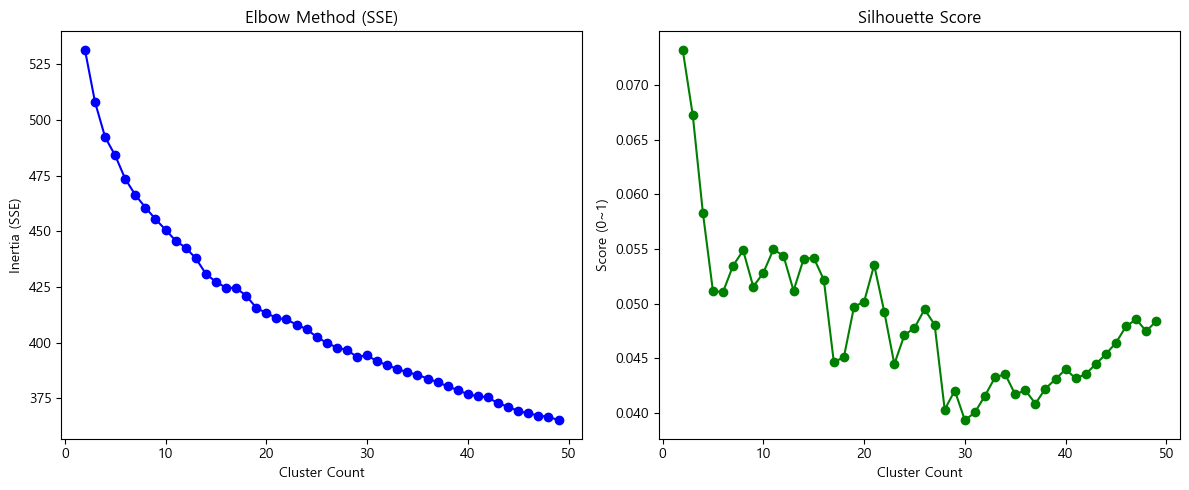

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []
k_range = range(2, 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(image_features_np)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(image_features_np, kmeans.labels_)
    silhouettes.append(score)

# Í∑∏ÎûòÌîÑ Ï∂úÎ†•
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-')
plt.title("Elbow Method (SSE)")
plt.xlabel("Cluster Count")
plt.ylabel("Inertia (SSE)")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, 'go-')
plt.title("Silhouette Score")
plt.xlabel("Cluster Count")
plt.ylabel("Score (0~1)")

plt.tight_layout()
plt.show()

In [49]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_ids = kmeans.fit_predict(image_features_np)

C:\Users\hnn07\AppData\Local\Temp\ipykernel_24292\322769285.py:25: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) Malgun Gothic.
  plt.tight_layout()


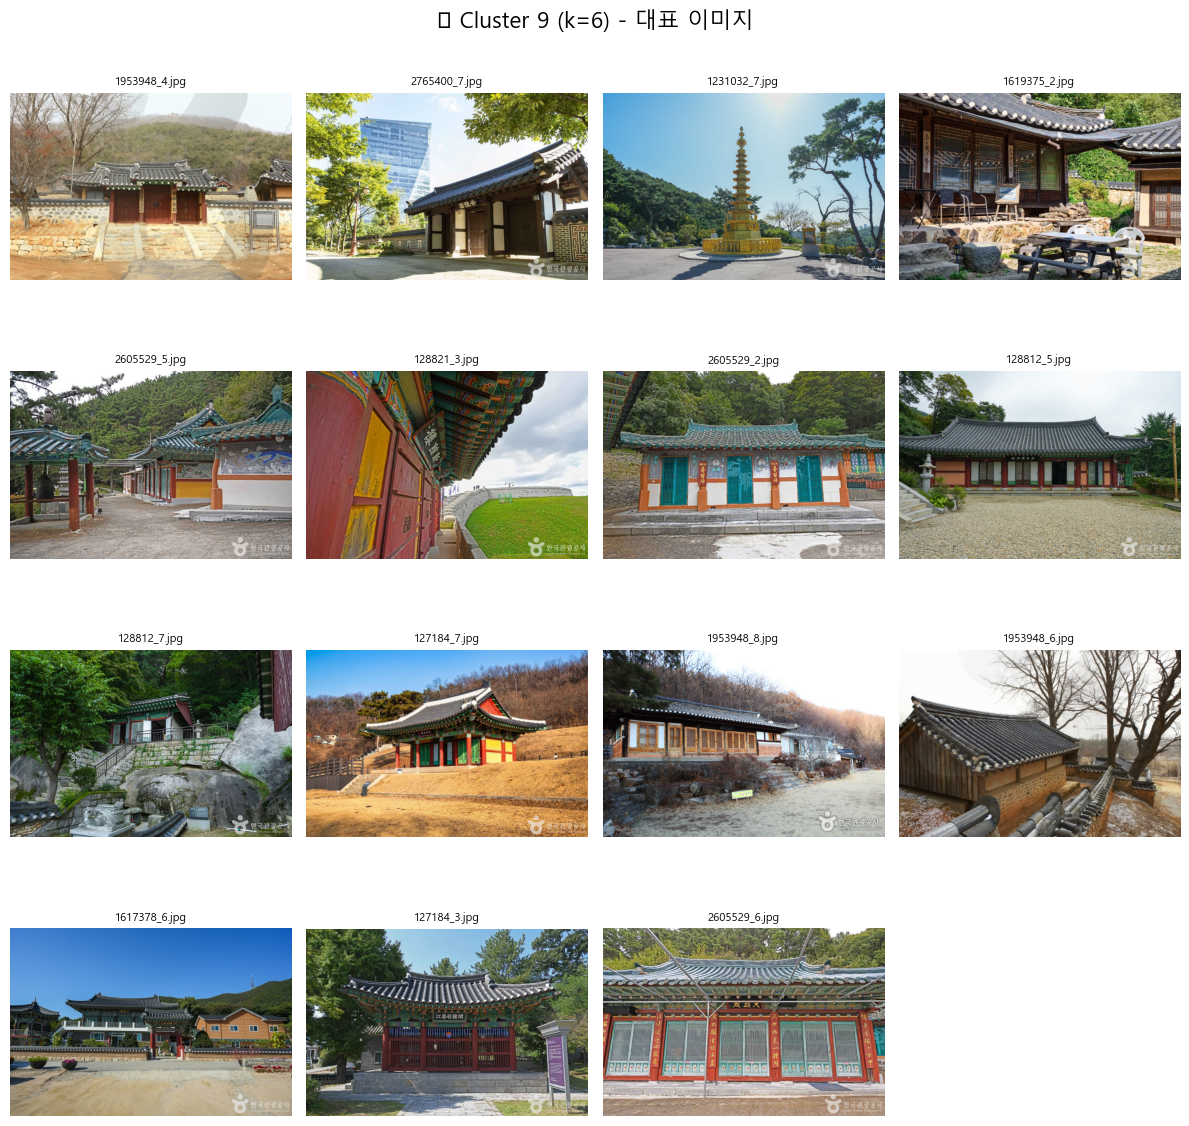

In [53]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

# üëá ÏòàÏãú: Cluster 3 ÏÑ†ÌÉù
target_cluster = 9
selected_idx = [i for i, cid in enumerate(cluster_ids) if cid == target_cluster]

# 16Í∞úÎßå ÎûúÎç§ Ï∂îÏ∂ú
sample_idx = random.sample(selected_idx, min(15, len(selected_idx)))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 12))
for i, idx in enumerate(sample_idx):
    image_path = os.path.join(image_dir, file_list[idx])
    image = Image.open(image_path)

    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"{file_list[idx]}", fontsize=8)

plt.suptitle(f"üü¢ Cluster {target_cluster} (k=6) - ÎåÄÌëú Ïù¥ÎØ∏ÏßÄ", fontsize=16)
plt.tight_layout()
plt.show()

### PickleÎ°ú Ï†ÄÏû•

In [54]:
import pickle

with open("clip_image_embeddings.pkl", "wb") as f:
    pickle.dump({
        "features": image_features_np,
        "filenames": file_list
    }, f)

print("‚úÖ ÏûÑÎ≤†Îî© Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å: clip_image_embeddings.pkl")

‚úÖ ÏûÑÎ≤†Îî© Îç∞Ïù¥ÌÑ∞ Ï†ÄÏû• ÏôÑÎ£å: clip_image_embeddings.pkl


### Î∂àÎü¨Ïò¨ Îïå

In [5]:
import pickle
with open("incheon_image_embeddings.pkl", "rb") as f:
    data = pickle.load(f)
    image_features_np = data["features"]
    file_list = data["filenames"]